In [5]:
%%shell
jupyter nbconvert --to html /content/LucaScutari_Final_Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb

[NbConvertApp] Converting notebook /content/LucaScutari_Final_Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb to html
[NbConvertApp] Writing 1284201 bytes to /content/LucaScutari_Final_Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.html


# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
   - Per the context given for the project, this problem is important to solve due to the huge demand for used cars in the Indian Market. Sale of new cars has declined, so ensuring that the data of the pre-owned car market is accurate and proper will make it easier and potentially cheaper for potential customers looking for cars to purchase one.

### **The objective:**

 - What is the intended goal?
   - The intended goal of this project is to come up with a pricing model that can be applied to any used car in the market to effectively predict its price and, consequently, help tech start-up Cars4U flourish by maximizing profit.

### **The key questions:**

- What are the key questions that need to be answered?
  - Some key questions that need to be answered are:
    - What data is truly reliable for predicting the price of used cars?
    - Is there any incoherent/inaccurate data present in the database?
    - How accurate do we need the model to be?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
  - We are trying to solve the issue of taking a long time assessing the price of future cars whenever they enter the market for selling. By providing the model to predict the prices, the time spent by the car off the market is decreased, as well as removing the chance of potentially putting off customers with inappropriate prices, which causes Cars4U to increase their profits.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [6]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [7]:
df = pd.read_csv("used_cars.csv")

## Data Overview

- Observations (find below)
- Sanity checks

In [8]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [9]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [10]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[0])

Number of rows:  7253
Number of columns:  7253


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


### **Data Overview Obervations**


*   A lot of the "New_price" and "Price" column values are empty. Specifically, 6247 null in New_price and 1234 null in Price.
*   There are also 2 null in Mileage, 46 null in Engine, 53 null in Seats, and 175 in Power.
*   There are 6 float64 columns, 5 object columns, and 3 int64 columns.
*   There are no duplicated rows of values.
*   The first column, "S.No.", has no inherent purpose, as it is just the same as the index number.




In [14]:
df.drop("S.No.", axis=1, inplace=True)

In [15]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [16]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


In [17]:
df.describe(include="object")

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


In [18]:
obj_col = df.select_dtypes(include = ['object']).columns

for column in obj_col:

    print("Column", column, "has:")

    print(df[column].unique())

    print()
    print()

Column Name has:
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']


Column Location has:
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


Column Fuel_Type has:
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


Column Transmission has:
['Manual' 'Automatic']


Column Owner_Type has:
['First' 'Second' 'Fourth & Above' 'Third']




In [19]:
df.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In [20]:
df.sort_values('Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic



---

1. The summary statistics for both numerical and categorical variables have been explored above.
2. Some unique observations worth pointing out are the presence of cars with 0 Mileage, which raises some concerns considering this is a database for used cars, as well as the presence of a car with 6500000 kilometers driven.
3. See the answer to question 2 for such cases.

In [21]:
# Removing the unrealistic data
df = df.drop(2328)
df = df.reset_index(drop=True)

df = df[df['Mileage'] != 0]
df = df.reset_index(drop=True)

df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7171.000000,7171.000000,7169.000000,7137.000000,7041.000000,7132.000000,1002.000000,5950.000000
mean,2013.409985,57667.522242,18.346859,1615.460698,112.640457,5.282109,22.670998,9.448420
std,3.206615,37416.263860,4.158106,592.633633,53.420289,0.809112,27.761111,11.115635
min,1996.000000,171.000000,6.400000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2012.000000,34000.000000,15.300000,1198.000000,75.000000,5.000000,7.880000,3.500000
50%,2014.000000,53138.000000,18.200000,1493.000000,94.000000,5.000000,11.500000,5.650000
75%,2016.000000,73000.000000,21.100000,1968.000000,138.100000,5.000000,25.520000,9.915000
max,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables
2. Check the distribution of the different variables. Are the distributions skewed?
3. Do we need to do log_transformation, and if so, for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations.



---

1. Univariate analysis for numerical and categorical variables found below.
2. After analyzing the distribution of the different variables, the only ones found that had a skewed distribution are "Kilometers_Driven" and "Price", which are both right skewed. This makes sense, as used cars listed for sale tend to be cheaper unless its a more luxury model (which would justify the lower quantities of higher prices) and, although used regardless, they have to be incredibly well preserved for them to have very high kilometers driven and still be in a sellable state.
3. Log transformation will be done for Price and Kilometers Driven for the sake of better data to work with once the model is created.
4. The log transformation was done below; something worth pointing out that, although Log(Price) is more evenly distributed, Log(Kilometers Driven) coule be argued to be very slightly left skewed.

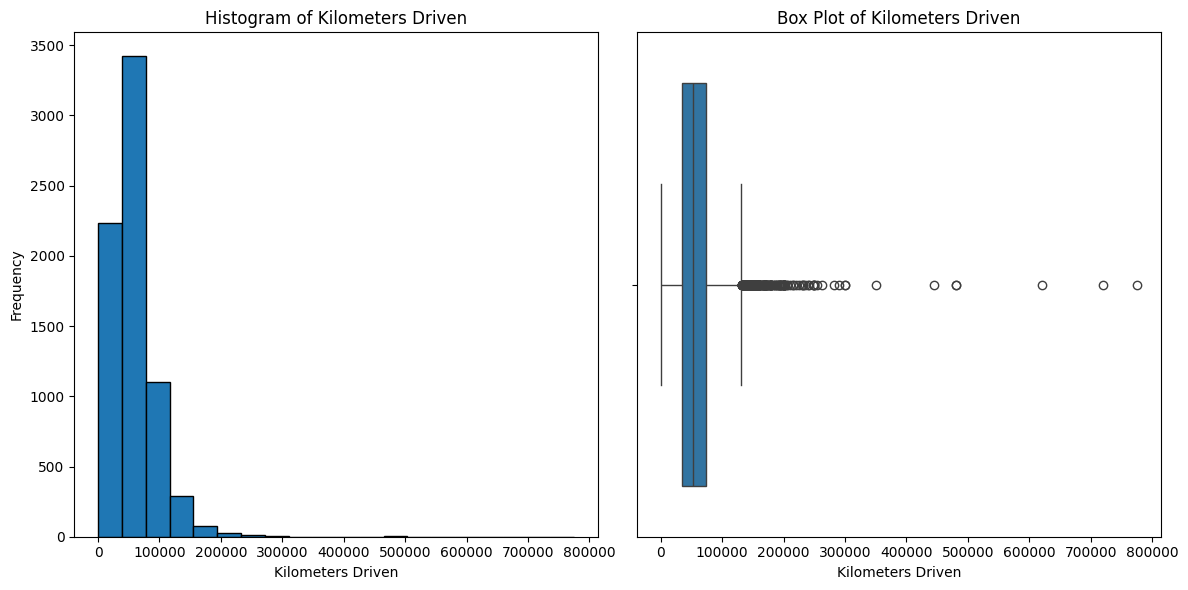

In [22]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Kilometers_Driven'], bins=20, edgecolor='black')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.title('Histogram of Kilometers Driven')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Kilometers_Driven'])
plt.xlabel('Kilometers Driven')
plt.title('Box Plot of Kilometers Driven')

plt.tight_layout()
plt.show()

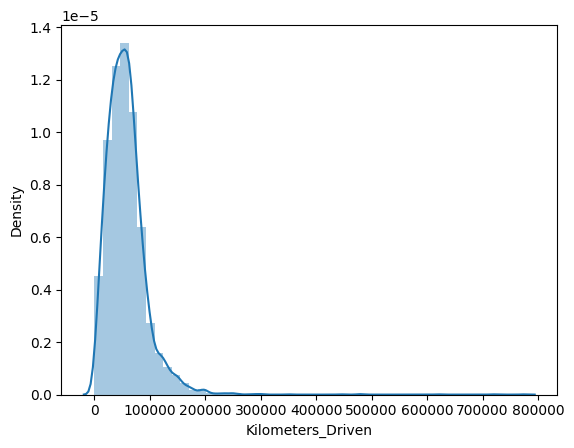

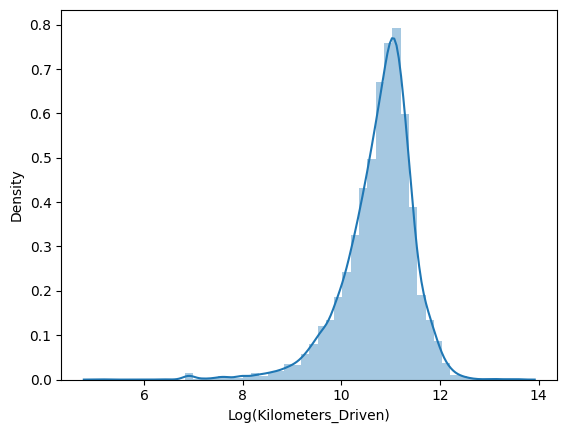

In [23]:
sns.distplot(df["Kilometers_Driven"], axlabel = "Kilometers_Driven")
plt.show()
sns.distplot(np.log(df["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)")
plt.show()
df["Kilometers_Driven_Log"] = np.log(df["Kilometers_Driven"])

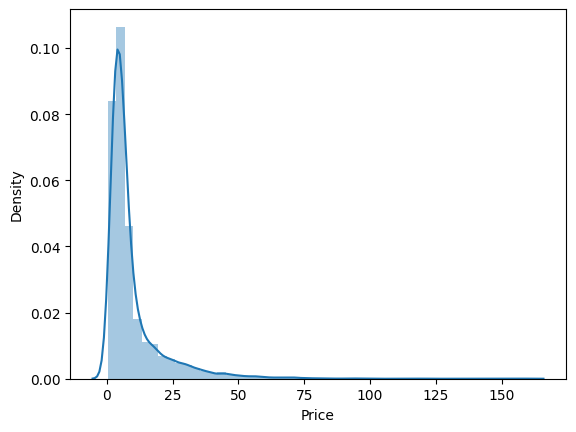

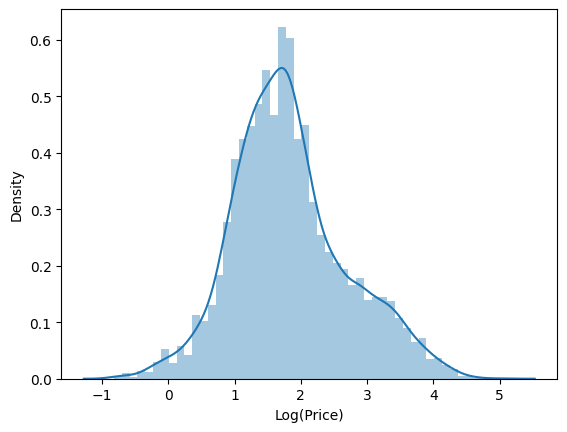

In [24]:
sns.distplot(df["Price"], axlabel = "Price")
plt.show()
sns.distplot(np.log(df["Price"]), axlabel = "Log(Price)")
plt.show()
df["Price_Log"] = np.log(df["Price"])

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps).
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations.



---

1. See the scatter plots below.
2. From the 2 log transformed values:
  1. Between the Year and Log(Price) of the car, the relationship is positive. As the year of the car listed increases, then the price (or more accurately, the log of the price) increases as well.
  2. Between the Year and Log(Kilometers Driven) of the car, the relationship is negative. As the year of the car listed increases, then the kilometers driven (or more accurately, the log of the kilometers driven) decreases.
3. See the box plot between Log(Price) and Location below. Some observations worth pointing out are:
  1. The Locations Coimbatore and Bangalore have all of its values within the whiskers of the box plot, while all others have outlier values.
  2. Simultaneously, Coimbatore and Bangalore also have, on average, the highest minimum, 25%, medium, 75%, and max values.
  3. Pune has the cheapest possible car listed, while Hyderabad has the most expensive possible car listed.

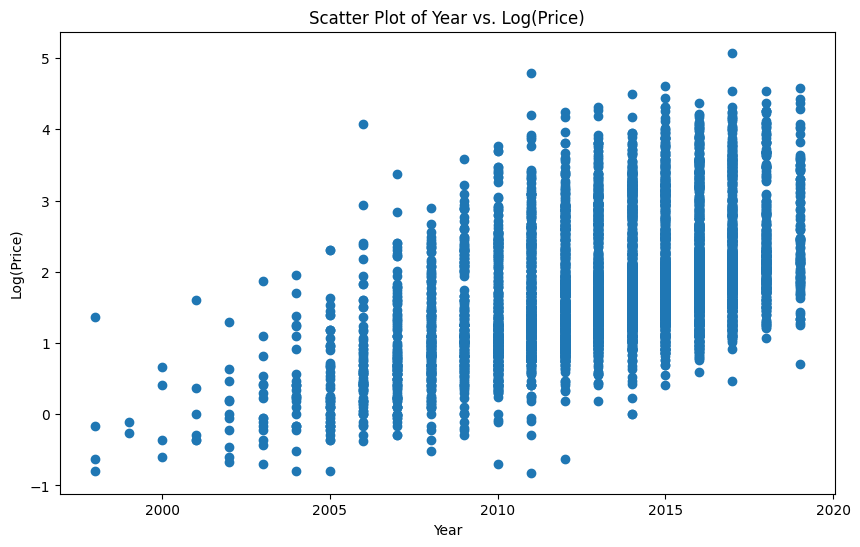

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price_Log'])
plt.ylabel('Log(Price)')
plt.xlabel('Year')
plt.title('Scatter Plot of Year vs. Log(Price)')
plt.show()

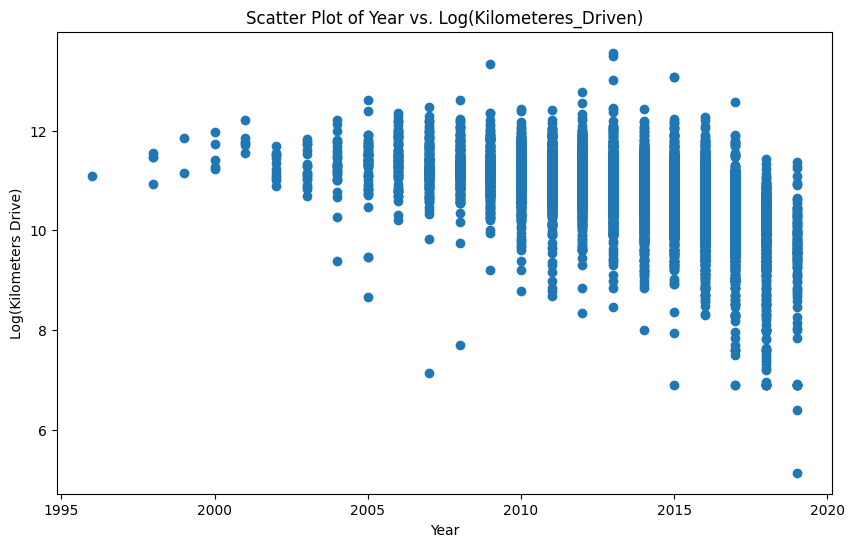

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Kilometers_Driven_Log'])
plt.ylabel('Log(Kilometers Drive)')
plt.xlabel('Year')
plt.title('Scatter Plot of Year vs. Log(Kilometeres_Driven)')
plt.show()

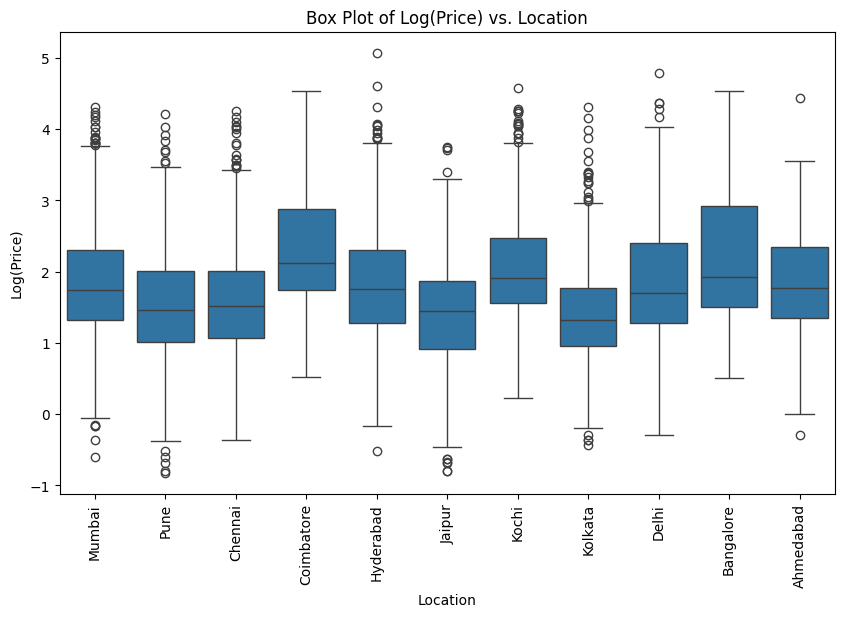

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price_Log', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Log(Price) vs. Location')
plt.xlabel('Location')
plt.ylabel('Log(Price)')
plt.show()

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [28]:
df['Brand'] = df['Name'].str.split().str[0]
df['Temp_Model'] = df['Name'].str.split(n=1).str[1]
df['Model'] = df['Temp_Model'].str.split().str[0]
df.drop('Temp_Model', axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_Log,Price_Log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4


### **Missing value treatment**

In [29]:
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,34
Power,130


In [30]:
df['Seats'] = df.groupby('Model')['Seats'].transform(lambda x: x.ffill())
df['Seats'] = df.groupby('Model')['Seats'].transform(lambda x: x.bfill())

In [31]:
df['Mileage'] = df['Mileage'].fillna((df['Mileage'].mean()))

In [32]:
df['Engine'] = df.groupby('Model')['Engine'].transform(lambda x: x.ffill())
df['Engine'] = df.groupby('Model')['Engine'].transform(lambda x: x.bfill())

In [33]:
df['Power'] = df.groupby('Model')['Power'].transform(lambda x: x.ffill())
df['Power'] = df.groupby('Model')['Power'].transform(lambda x: x.bfill())

In [34]:
df = df.dropna(subset=['Price'])
df = df.reset_index(drop=True)

In [35]:
df['New_price'] = df['New_price'].fillna(df['Price'])

In [36]:
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,7


In [37]:
df = df.dropna(subset=['Power'])
df = df.reset_index(drop=True)
df = df.dropna(subset=['Seats'])
df = df.reset_index(drop=True)

In [38]:
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?
- As mentioned before in the Bivariate Analysis portion of the project, there is a positive relationship between the Year and Log(Price) of the car, as well as there being a negative relationship between the Year and Log(Kilometers Driven) of the car. This provides a very reliable way of predicting the price within a certain range.
- The location where the car is sold can change the price of the car significantly, as Coimbatore and Bangalore have, on average, the highest minimum, 25%, medium, 75%, and max values. In a similar fashion, Pune has the cheapest possible car listed, while Hyderabad has the most expensive possible car listed.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why should we drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?
  1.

In [39]:
#Step 1: Separating the independent variables and the dependent variable.
df_copy = df.copy()

independent = df_copy.drop(['Name','Price','Price_Log','Kilometers_Driven'], axis = 1)
dependent = df_copy[["Price_Log", "Price"]]

#Step 2: Encoding the categorical variables in independent using pd.dummies
independent = pd.get_dummies(independent, drop_first = True)

#Step 3: Splitting the data into train and test using train_test_split
indep_train, indep_test, dep_train, dep_test = train_test_split(independent, dependent, test_size = 0.3, random_state = 1)

print(indep_train.shape, indep_test.shape)

(4160, 257) (1783, 257)


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### Linear

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(indep_train, dep_train['Price_Log'])

# Make predictions on the test data
predictions = linear_model.predict(indep_test)

# Evaluate the model
r2 = r2_score(dep_test['Price_Log'], predictions)
rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], predictions))

print("R-Squared:", r2)
print("RMSE:", rmse)

R-Squared: 0.9439445515060669
RMSE: 0.20457943830386954


In [41]:
import statsmodels.api as sm

# Add a constant term to the independent variables
indep_train_const = sm.add_constant(indep_train)
indep_test_const = sm.add_constant(indep_test)

# Ensure data types are compatible
indep_train_const = indep_train_const.astype(float)
dep_train_log = dep_train['Price_Log'].astype(float)

# Create and fit the OLS model
model = sm.OLS(dep_train_log, indep_train_const)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     519.5
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:42:33   Log-Likelihood:                 1786.5
No. Observations:                4160   AIC:                            -3129.
Df Residuals:                    3938   BIC:                            -1723.
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [42]:
# Drop brand and model columns
indep_train2 = indep_train.drop(columns=[col for col in indep_train.columns if 'Brand_' in col or 'Model_' in col])
indep_test2 = indep_test.drop(columns=[col for col in indep_test.columns if 'Brand_' in col or 'Model_' in col])

# Add a constant term
indep_train2_const = sm.add_constant(indep_train2)
indep_test2_const = sm.add_constant(indep_test2)

# Ensure data types are compatible
indep_train2_const = indep_train2_const.astype(float)
dep_train_log = dep_train['Price_Log'].astype(float)

# Create and fit the OLS model
model2 = sm.OLS(dep_train_log, indep_train2_const)
results2 = model2.fit()

# Print the model summary
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1559.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:42:33   Log-Likelihood:                -422.75
No. Observations:                4160   AIC:                             897.5
Df Residuals:                    4134   BIC:                             1062.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = indep_train2_const.columns
vif_data["VIF"] = [variance_inflation_factor(indep_train2_const.values, i) for i in range(indep_train2_const.shape[1])]

print(vif_data)

                      feature            VIF
0                       const  853573.107649
1                        Year       2.125157
2                     Mileage       3.390829
3                      Engine       9.435155
4                       Power       8.572282
5                       Seats       1.977465
6                   New_price       2.580935
7       Kilometers_Driven_Log       1.737425
8          Location_Bangalore       2.539042
9            Location_Chennai       2.900587
10        Location_Coimbatore       3.443616
11             Location_Delhi       3.225356
12         Location_Hyderabad       3.787358
13            Location_Jaipur       2.638842
14             Location_Kochi       3.586519
15           Location_Kolkata       3.198514
16            Location_Mumbai       4.010179
17              Location_Pune       3.403481
18           Fuel_Type_Diesel      29.829067
19         Fuel_Type_Electric       1.033155
20              Fuel_Type_LPG       1.181104
21        

In [44]:
# Drop fuel type columns
indep_train3 = indep_train2.drop(columns=[col for col in indep_train2.columns if 'Fuel_Type_' in col])
indep_test3 = indep_test2.drop(columns=[col for col in indep_test2.columns if 'Fuel_Type_' in col])

# Add a constant term
indep_train3_const = sm.add_constant(indep_train3)
indep_test3_const = sm.add_constant(indep_test3)

# Ensure data types are compatible
indep_train3_const = indep_train3_const.astype(float)
dep_train_log = dep_train['Price_Log'].astype(float)

# Create and fit the OLS model
model3 = sm.OLS(dep_train_log, indep_train3_const)
results3 = model3.fit()

# Print the model summary
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1589.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:42:33   Log-Likelihood:                -713.93
No. Observations:                4160   AIC:                             1472.
Df Residuals:                    4138   BIC:                             1611.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [45]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = indep_train3_const.columns
vif_data["VIF"] = [variance_inflation_factor(indep_train3_const.values, i) for i in range(indep_train3_const.shape[1])]

print(vif_data)

                      feature            VIF
0                       const  846574.183568
1                        Year       2.110740
2                     Mileage       2.198000
3                      Engine       7.718578
4                       Power       8.416705
5                       Seats       1.890825
6                   New_price       2.554705
7       Kilometers_Driven_Log       1.611603
8          Location_Bangalore       2.538120
9            Location_Chennai       2.899858
10        Location_Coimbatore       3.441800
11             Location_Delhi       3.223821
12         Location_Hyderabad       3.780315
13            Location_Jaipur       2.636651
14             Location_Kochi       3.580497
15           Location_Kolkata       3.197024
16            Location_Mumbai       4.002423
17              Location_Pune       3.400937
18        Transmission_Manual       1.862527
19  Owner_Type_Fourth & Above       1.010484
20          Owner_Type_Second       1.161622
21        

In [46]:
# Drop power-related column
indep_train4 = indep_train3.drop(columns=['Power'])
indep_test4 = indep_test3.drop(columns=['Power'])

# Add a constant term
indep_train4_const = sm.add_constant(indep_train4)
indep_test4_const = sm.add_constant(indep_test4)

# Ensure data types are compatible
indep_train4_const = indep_train4_const.astype(float)
dep_train_log = dep_train['Price_Log'].astype(float)

# Create and fit the OLS model
model4 = sm.OLS(dep_train_log, indep_train4_const)
results4 = model4.fit()

# Print the model summary
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1463.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:42:34   Log-Likelihood:                -955.25
No. Observations:                4160   AIC:                             1952.
Df Residuals:                    4139   BIC:                             2085.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [47]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = indep_train4_const.columns
vif_data["VIF"] = [variance_inflation_factor(indep_train4_const.values, i) for i in range(indep_train4_const.shape[1])]

print(vif_data)

                      feature            VIF
0                       const  846466.137434
1                        Year       2.110143
2                     Mileage       2.182960
3                      Engine       3.169095
4                       Seats       1.523493
5                   New_price       2.165176
6       Kilometers_Driven_Log       1.611598
7          Location_Bangalore       2.538119
8            Location_Chennai       2.897156
9         Location_Coimbatore       3.440603
10             Location_Delhi       3.223600
11         Location_Hyderabad       3.774376
12            Location_Jaipur       2.636205
13             Location_Kochi       3.580409
14           Location_Kolkata       3.196217
15            Location_Mumbai       4.000250
16              Location_Pune       3.400465
17        Transmission_Manual       1.727187
18  Owner_Type_Fourth & Above       1.010341
19          Owner_Type_Second       1.161199
20           Owner_Type_Third       1.105055


In [48]:
# Drop location-related columns
indep_train5 = indep_train4.drop(columns=[col for col in indep_train4.columns if 'Location_' in col])
indep_test5 = indep_test4.drop(columns=[col for col in indep_test4.columns if 'Location_' in col])

# Add a constant term
indep_train5_const = sm.add_constant(indep_train5)
indep_test5_const = sm.add_constant(indep_test5)

# Ensure data types are compatible
indep_train5_const = indep_train5_const.astype(float)
dep_train_log = dep_train['Price_Log'].astype(float)

# Create and fit the OLS model
model5 = sm.OLS(dep_train_log, indep_train5_const)
results5 = model5.fit()

# Print the model summary
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2698.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:42:34   Log-Likelihood:                -1107.2
No. Observations:                4160   AIC:                             2236.
Df Residuals:                    4149   BIC:                             2306.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [49]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = indep_train5_const.columns
vif_data["VIF"] = [variance_inflation_factor(indep_train5_const.values, i) for i in range(indep_train5_const.shape[1])]

print(vif_data)

                      feature            VIF
0                       const  758231.425480
1                        Year       1.889204
2                     Mileage       2.117758
3                      Engine       3.141337
4                       Seats       1.513777
5                   New_price       2.135996
6       Kilometers_Driven_Log       1.488264
7         Transmission_Manual       1.710120
8   Owner_Type_Fourth & Above       1.006985
9           Owner_Type_Second       1.119051
10           Owner_Type_Third       1.077132


In [50]:
# Drop owner-related columns
indep_train6 = indep_train5.drop(columns=[col for col in indep_train5.columns if 'Owner_' in col])
indep_test6 = indep_test5.drop(columns=[col for col in indep_test5.columns if 'Owner_' in col])

# Add a constant term
indep_train6_const = sm.add_constant(indep_train6)
indep_test6_const = sm.add_constant(indep_test6)

# Ensure data types are compatible
indep_train6_const = indep_train6_const.astype(float)
dep_train_log = dep_train['Price_Log'].astype(float)

# Create and fit the OLS model
model6 = sm.OLS(dep_train_log, indep_train6_const)
results6 = model6.fit()

# Print the model summary
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3821.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:42:34   Log-Likelihood:                -1124.2
No. Observations:                4160   AIC:                             2264.
Df Residuals:                    4152   BIC:                             2315.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -238.50

In [51]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = indep_train6_const.columns
vif_data["VIF"] = [variance_inflation_factor(indep_train6_const.values, i) for i in range(indep_train6_const.shape[1])]

print(vif_data)

                 feature            VIF
0                  const  693953.749656
1                   Year       1.727945
2                Mileage       2.116710
3                 Engine       3.140635
4                  Seats       1.511699
5              New_price       2.134836
6  Kilometers_Driven_Log       1.483952
7    Transmission_Manual       1.708511


#### Observations
- Although VIF is extremely low (with const being the only obvious exception), the condition number is extremely large, indicating possible multicollinearity.
- This could not be due to outliers as those were taken into account in earlier portions of this project, so the only things that come to mind in terms of why could be the case are:
  - VIF and the condition number analyze different parts of multicollinearity, so there could be something in the data that the VIF isn't picking up on
  - Linear regression isn't the appropriate model for the data in this project

### Ridge / Lasso Regression

In [52]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(indep_train6, dep_train['Price_Log'])

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(indep_train6, dep_train['Price_Log'])

ridge_predictions = ridge_model.predict(indep_test6)
lasso_predictions = lasso_model.predict(indep_test6)

# Ridge Regression
ridge_r2 = r2_score(dep_test['Price_Log'], ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], ridge_predictions))

print("Ridge Regression:")
print("R-Squared:", ridge_r2)
print("RMSE:", ridge_rmse)

# Lasso Regression
lasso_r2 = r2_score(dep_test['Price_Log'], lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], lasso_predictions))

print("\nLasso Regression:")
print("R-Squared:", lasso_r2)
print("RMSE:", lasso_rmse)

Ridge Regression:
R-Squared: 0.8399200846588852
RMSE: 0.3457175996665612

Lasso Regression:
R-Squared: 0.6760321570305281
RMSE: 0.49181754564934765


In [53]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge_cv_model = RidgeCV(alphas=[0.0001, 0.001, 0.01], cv=5)
ridge_cv_model.fit(indep_train6, dep_train['Price_Log'])

lasso_cv_model = LassoCV(alphas=[0.0001, 0.001, 0.01], cv=5)
lasso_cv_model.fit(indep_train6, dep_train['Price_Log'])

best_ridge_alpha = ridge_cv_model.alpha_
best_lasso_alpha = lasso_cv_model.alpha_

print("Best alpha for Ridge Regression:", best_ridge_alpha)
print("Best alpha for Lasso Regression:", best_lasso_alpha)

Best alpha for Ridge Regression: 0.0001
Best alpha for Lasso Regression: 0.0001


In [54]:
ridge_model2 = Ridge(alpha=0.0001)
ridge_model2.fit(indep_train6, dep_train['Price_Log'])

lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(indep_train6, dep_train['Price_Log'])

ridge_predictions = ridge_model.predict(indep_test6)
lasso_predictions = lasso_model.predict(indep_test6)

# Ridge Regression
ridge_r2 = r2_score(dep_test['Price_Log'], ridge_predictions)
ridge_rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], ridge_predictions))

print("Ridge Regression:")
print("R-Squared:", ridge_r2)
print("RMSE:", ridge_rmse)

# Lasso Regression
lasso_r2 = r2_score(dep_test['Price_Log'], lasso_predictions)
lasso_rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], lasso_predictions))

print("\nLasso Regression:")
print("R-Squared:", lasso_r2)
print("RMSE:", lasso_rmse)

Ridge Regression:
R-Squared: 0.8399200846588852
RMSE: 0.3457175996665612

Lasso Regression:
R-Squared: 0.8399205662825836
RMSE: 0.3457170795953397


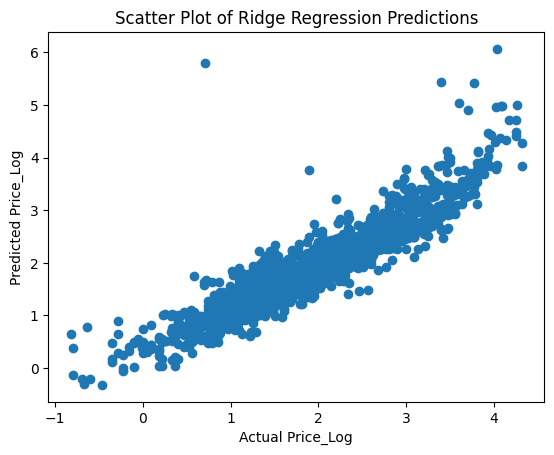

In [63]:
predictions = ridge_model2.predict(indep_test6)

# Create a scatter plot
plt.scatter(dep_test['Price_Log'], predictions)  # Actual vs. Predicted
plt.xlabel("Actual Price_Log")
plt.ylabel("Predicted Price_Log")
plt.title("Scatter Plot of Ridge Regression Predictions")
plt.show()

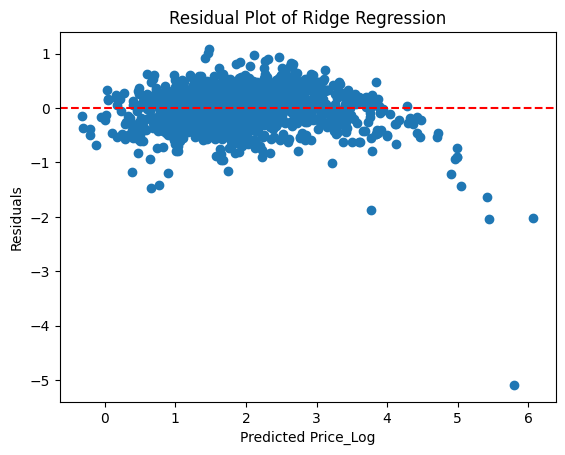

In [64]:
# Assuming you have already trained ridge_model2 and made predictions:
predictions = ridge_model2.predict(indep_test6)

# Calculate residuals
residuals = dep_test['Price_Log'] - predictions

# Create a residual plot
plt.scatter(predictions, residuals)  # Predicted vs. Residuals
plt.xlabel("Predicted Price_Log")
plt.ylabel("Residuals")
plt.title("Residual Plot of Ridge Regression")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.show()

#### Observations
- Both the Ridge and Lasso Regressions perform best when the Alpha is at 0.0001.
- These values can fit unseen data the best under those values, and R-Squared for both is extremely high, while the RMSE isn't. This points to a generally well-performing regression model.

### Decision Trees

In [55]:
from sklearn.tree import DecisionTreeRegressor

# Creating a Decision Tree Regressor object
tree_model = DecisionTreeRegressor(random_state=1)

# Fitting the model to the training data
tree_model.fit(indep_train6, dep_train['Price_Log'])

# Making predictions on the test data
predictions = tree_model.predict(indep_test6)

# Evaluating the model
r2 = r2_score(dep_test['Price_Log'], predictions)
rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], predictions))

print("Decision Tree Regression:")
print("R-Squared:", r2)
print("RMSE:", rmse)

Decision Tree Regression:
R-Squared: 0.9564297239789236
RMSE: 0.1803633203159599


#### **Hyperparameter Tuning: Decision Tree**

In [56]:
from sklearn.model_selection import GridSearchCV
# Defining the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Creating a Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=1)

# Creating GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the GridSearchCV to the data
grid_search.fit(indep_train6, dep_train['Price_Log'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: -0.019510065625271467


In [57]:
# Trainning the model with the parameters from before
best_tree_model = DecisionTreeRegressor(**best_params, random_state=1)
best_tree_model.fit(indep_train6, dep_train['Price_Log'])

# Evaluating the new model
predictions = best_tree_model.predict(indep_test6)
r2 = r2_score(dep_test['Price_Log'], predictions)
rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], predictions))

print("Decision Tree Regression:")
print("R-Squared:", r2)
print("RMSE:", rmse)

Decision Tree Regression:
R-Squared: 0.9529884792309377
RMSE: 0.18735065518666688


**Feature Importance**

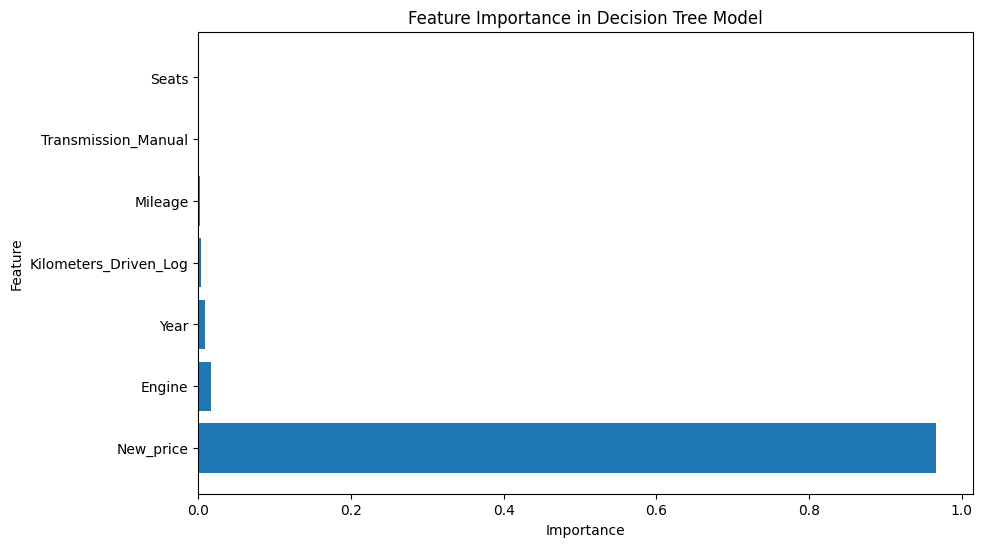

In [58]:
feature_importances = best_tree_model.feature_importances_
feature_names = indep_train6.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

#### Observations
Using the previously whittled down dataframe from the linear regression testing (tests with the full data set were conducted, no change was found in results), it is evident that the new_price of other cars, a.k.a. the price of the car if it was new, is the most important feature of determining the the price of a used car., with Engine and Year being 2nd and 3rd in terms of importance, although MUCH smaller in comparison.

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(indep_train6, dep_train['Price_Log'])

predictions = rf_model.predict(indep_test6)

# Evaluating the model
r2 = r2_score(dep_test['Price_Log'], predictions)
rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], predictions))

print("Random Forest Regression:")
print("R-Squared:", r2)
print("RMSE:", rmse)

Random Forest Regression:
R-Squared: 0.9661972425934584
RMSE: 0.1588653304086573


#### **Hyperparameter Tuning: Random Forest**

In [60]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [6],
    'min_samples_leaf': [2]
}

# Creating a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=1)

# Creating GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fitting the GridSearchCV to the data
grid_search.fit(indep_train6, dep_train['Price_Log'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}
Best Score: -0.014827837799816482


In [61]:
# Training a Random Forest Regressor
best_rf_model = RandomForestRegressor(**best_params, random_state=1)

# Fitting the model to the training data
best_rf_model.fit(indep_train6, dep_train['Price_Log'])

# Evaluating the new model
predictions = best_rf_model.predict(indep_test6)
r2 = r2_score(dep_test['Price_Log'], predictions)
rmse = np.sqrt(mean_squared_error(dep_test['Price_Log'], predictions))

print("Random Forest Regression:")
print("R-Squared:", r2)
print("RMSE:", rmse)

Random Forest Regression:
R-Squared: 0.9642948021978418
RMSE: 0.16327465986677572


**Feature Importance**

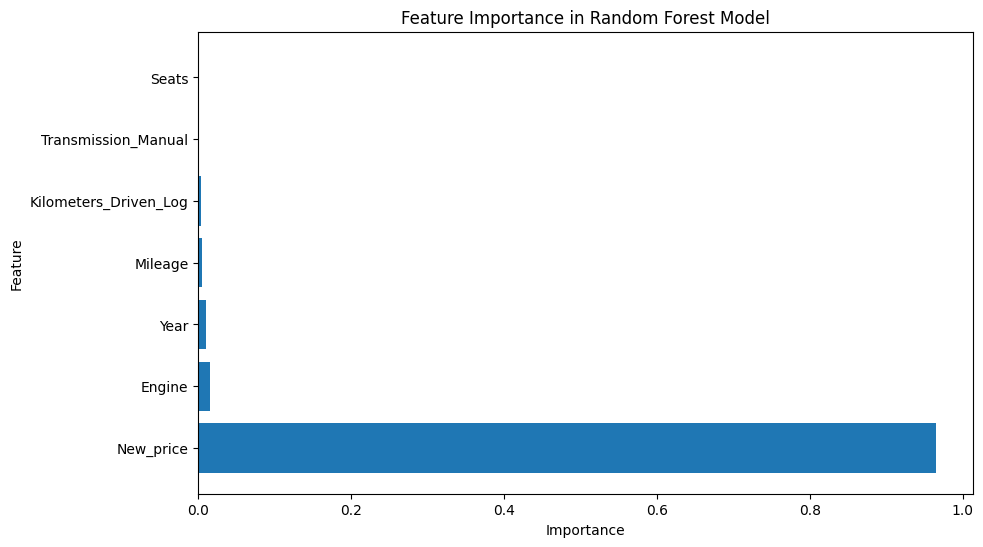

In [62]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Get feature names
feature_names = indep_train6.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

#### Observations
- Similar to the Decision Tree Model, the feature of higher importance by a WIDE margin is New_price, a.k.a. the price of the car if it was new, with Engine and Year being 2nd and 3rd in terms of importance, although MUCH smaller in comparison.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?


---
**Answer:**

After going through all 4 of the models, it seems that the most accurate is Random Forest, although not by much in comparison to the Decision Trees. Random Forest has the highest R-squared value, while simultaneously having one of the lowest RMSE value. With that said, Random Forest was the one that took the longest to execute and model, even if it was the highest performing and "most efficient" model. Decision Trees has similar R-squared and RMSE values while being significantly faster to execute, so depending on the urgency of a request, Decision Trees might be a better choice. In order for Random Forest to execute in a reasonable amount of time, 1 value test per parameter in the parameter grid was done, which could lead to a slightly unreliable set of improvements to the model. With that said, the Random Forest is much better at fitting "outliers", which means that Linear and Lasso Regression are much better at pointing them out if fixes are needed to the data. This might also be a good argument for choosing Linear or Lasso due to ease of access to the data and its robustness.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?



---
**Answer:**
Some key insights relevant to this problem that are worth considering for the future of Cars4U as a business and for the models are:
- The amount of incorrect or outright missing data, from cars that had impossibly high Kilometers Driven to cars that had on seats or price assigned at all. All of this data required cleaning before it was properly split and then used in the models, and if the car information isn't logged properly, this could severely impact how the model learns and behaves in the future.
- Even considering all of the missing and incorrect data that needed to be fixed, the R-squared results were really high across the board, and RMSE was excelent for all as well, meaning that there truly is a corellation present for Cars4U to utilize. Specifically, New_price, Engine, and Year are all great indicators of how much the used car should be listed.
- The presence of so many outliers in certain brands means that there is a luxury market that Cars4U could focus on instead of trying to sell all cars across the board, leading to potentially more precise models.
- Location also has an impact on price, but not as significant or consistently across the board to be considered in the calculations, although should be kept in mind if Cars4U decides to work as a local business instead of a country wide one.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?



---
**Answer:**

With everything I mentioned before in both Question 1 and 2, as well as the observations laid out throughout the Modelling process, I propose the Ridge Regression model, with Linear being a close second. Although I had mentioned that Random Forest is the highest performing model, it is also significantly more computationally expensive. Ridge Regression model can provide almost the same level of accuracy at a much faster pace. If we are taking into account all the work that needs to go into cleaning the data due to how many inacuracies there were (which if it wasn't necessary, would be a huge bonus for Random Forest), as well as how much more information you can get from the Ridge Regression Model, it makes the most sense for a starting business that needs to adapt quickly to use a faster and more robust model like the Ridge Regression Model.

# **Final Project Details**

## **Executive Summary**

- The Milestone showed that although the Random Forests and Decision Trees models have the best scores in terms of performance, the lack of concrete information to work with as well as the Random Forests model being a lot slower than the others leads to a more nuanced conversation of diminishing returns.
- Separating the Car Name into Name, Brand, and Model made it a lot more clear how much of an impact (or rather, lack thereof) it was having on determining the final price (with a couple of exceptions for luxury cars).
- From all of this, the idea of segmenting the price calculations by city seems like a more appropriate choice for deployment of the model, as trying to create a single, large model that tries to cover everything will lead to outliers being priced incorrectly and them affecting the model's capabilities.

## **Problem and Solution Summary**

### **Problem Summary**
The Indian market has an increasing demand for used cars, while simultaneously having a decrease in demand for new cars. This means that the company Cars4U, a tech start-up that wants to enter the market, needs a fast and effective solution to determining prices of the cars they are going to be selling. New cars have their price and supply determined by the Original Equipment Manufacturer, while used cars have a lot of factors that impact their price to consider, such as mileage, brand, model, year, location, and more.

Cars4U will gain a huge competitive advantage in the market if they are able to figure out a Machine Learning model that will help them assign prices for cars with said information. Choosing which one to use, as well as cleaning and optimizing the data they have, is their main hurdle in this endeavor.

### **Solution Summary**
After tuning the models further, experimenting with values for testing, and so on, the solution that I was able to find most effective is that of the Ridge Regression model.

As I mentioned in the Milestone observations, the Random Forest model is the best performing one by a non-negligeable amount, but it takes such a long time to execute that I cannot personally recommend it for a tech start-up that needs to minimize cost and maximize ease of use and deployability.

The Ridge Regression model provides some of the best predictions that was analyzed in this project while also being extremely efficient to run. If in the future, Cars4U wants to expand its capabilities or increase the reliability of its model, then the Random Forest model can be considered.

Further details of how the Ridge Regression model and its faster and simpler deployment can help this main problem can be found in the Recommendations for Implementation section below.

## **Recommendations for Implementation**

With everything from the exporatory data analysis taken into account, as well as the work done to consider each model and what has been mentioned in previous observation sections, it is easy to spot a large issue that should be tackled by Cars4U: the difference in price across different cities. Even though these are small differences, they are worth considering due to the large amount of outliers found in the data thanks to the box plots. A solution to this could be deploying multiple smaller models, one for each city, instead of a company wide model, which would produce a higher degree of accuracy in price estimations.

If a car does not have too many points of reference within the same city in order to compare itself to, such as luxury cars, then the data used could be widened to include other cities. Moreover, as time goes on and cars of similar price ranges, categories (affordable, vans, luxury, etc), and brands are added to the database, the necesity for widening the data included decreases, and more precise prices can be given.

Similarly, by making a lot of local models instead of a country wide model, you make the executing time of the model a lot faster by decreasing the amount of data it has to first learn from and then extrapolate onto. With that said, it is also important to keep in mind that there has to be enough data present for a proper prediction to be made, so early on in the life of Cars4U as a business, there might be certain cities with low data points that will be required to use more data to get prices for their cars.

This more segmented approach has also the benefit of being able to run on less intensive hardware, as less data to parse through and learn from means that a less powerful computer is needed to execute the task. The downside is that there would still be a need to have either a central database with all of the information, or a network of small databases that can share information to one another for when the testing criteria needs to be widened.

With all of this in mind, it is worth remembering that the contribution of the individuals working at Cars4U is invaluable for determining the price of newwer cars. For example, when the Tesla Model 3 first entered the second-use market, the price listed was a lot closer to the price of a new Tesla Model 3, and as time went on, the price steadily dropped to about half of its market price. Whenever a new technology or a novelty vehicle enters the Cars4U inventory, it is worth retraining the model frequently and account for the potential rapid fluctuation of prices.

Further analysis into other models, as well as further optimizations into the currently studied ones, can be conducted to potentially find a completely different model that might fit this data and problem in a better manner.